# load data from drive fer2013 plus


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#copy from  drive to runtime
!cp  /content/drive/MyDrive/GP/emotion_data/fer2013plus/fer2013new.csv  .
!cp  /content/drive/MyDrive/GP/emotion_data/fer2013/fer2013.csv .
#  0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
# neutral, happiness, surprise, sadness, anger, disgust, fear, contempt

In [ ]:
emotion_data = pd.read_csv('/content/fer2013.csv')
emotion_data_new = pd.read_csv('/content/fer2013new.csv')
X_train = []
y_train = []
X_test = []
y_test = []
emotions=['neutral','happiness','surprise','sadness','anger','disgust','fear','contempt']

In [ ]:
for (index, row), (_, row_n) in zip(emotion_data.iterrows(),emotion_data_new.iterrows()):
    k = row['pixels'].split(" ")
    if row_n['Usage'] == 'Training':
      for j in range(len(emotions)):
        if(row_n[emotions[j]]>=5):
          X_train.append(np.array(k))
          y_train.append(j)
    elif row_n['Usage'] == 'PublicTest':
         for j in range(len(emotions)):
          if(row_n[emotions[j]]>=5):
            X_test.append(np.array(k))
            y_test.append(j)

## code shared

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
#################################################
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_train=X_train.reshape((len(X_train),48,48))
X_test=X_test.reshape((len(X_test),48,48))
#################################################
X_test = X_test.astype(np.float)
#y_test = y_test.astype(np.integer)
X_train = X_train.astype(np.float)
y_train = y_train.astype(np.integer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykern

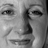

1169


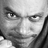

10229


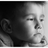

8499


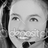

14997


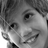

9292


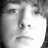

12038


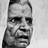

1698


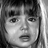

7899


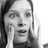

14733


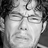

17723


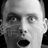

7849


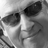

17999


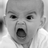

3087


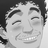

4312


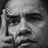

9365


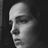

15767


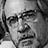

11023


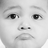

14035


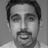

2465


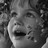

4409


In [ ]:
for i in range(20):
  t=np.random.randint(0,18000)
  cv2_imshow(X_train[t])
  print(t)

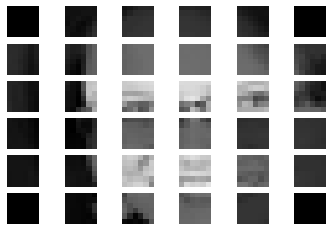

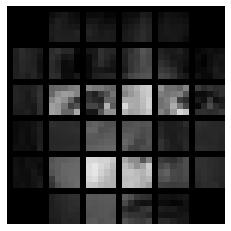

In [ ]:
import matplotlib.pyplot as plt
weights=[[0,1,1,1,1,0]
   ,[2,2,2,2,2,2]
   ,[2,4,4,4,4,2]
   ,[1,1,2,2,1,1]
   ,[1,2,4,4,2,1]
   ,[0,1,2,2,1,0]]
f, axarr = plt.subplots(6,6)
for i in range(6):
  for j in range(6):
    axarr[i,j].imshow(X_train[5][2:-2][2:-2][i*6:(i+1)*6,j*6:(j+1)*6]*weights[i][j],cmap='gray', vmin=0, vmax=4*255)
    axarr[i,j].axis('off')
plt.show() 

x=np.ones((36,36))
for i in range(6):
  for j in range(6):
    x[i*6:(i+1)*6,j*6:(j+1)*6]=X_train[7899][2:-2][2:-2][i*6:(i+1)*6,j*6:(j+1)*6]*weights[i][j]
    x[:,j*6]=0
    x[i*6,:]=0

plt.imshow(x,cmap='gray', vmin=0, vmax=4*255)
plt.axis('off')
plt.show() 

# models to train

## model-1 fisher face

### train data

In [ ]:
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
print( "training fisher face classifier")
print ("size of training set is:", len(y_train), "images")
fishface.train(X_train, np.asarray(y_train))


training fisher face classifier
size of training set is: 51450 images


### test data

In [ ]:
print ("predicting classification set")
cnt = 0
correct = 0
incorrect = 0
for image in X_test:
    pred, conf = fishface.predict(image)
    if pred == y_test[cnt]:
        correct += 1
        cnt += 1
    else:
        incorrect += 1
        cnt += 1
print(correct,incorrect,((100*correct)/(correct + incorrect)))

predicting classification set
1423 5430 20.76462862979717


### save model

In [ ]:
name = input("Enter the model time_test-data-name-any need")
fishface.save("/content/drive/MyDrive/GP/emotion_data/fishface"+name+".model")

### test one image

## model-2 Eign face

### train data

In [ ]:
EigenFace = cv2.face.EigenFaceRecognizer_create() #Initialize Eigen Face classifier
print( "training Eigen Face classifier")
print ("size of training set is:", len(y_train), "images")
EigenFace.train(X_train, np.asarray(y_train))

# take 30 min

### test data

In [ ]:
print ("predicting classification set")
cnt = 0
correct = 0
incorrect = 0
for image in X_test:
    pred, conf = EigenFace.predict(image)
    if pred == y_test[cnt]:
        correct += 1
        cnt += 1
    else:
        incorrect += 1
        cnt += 1
print(correct,incorrect,((100*correct)/(correct + incorrect)))

### save model

In [ ]:
name = input("Enter the model time_test-data-name-any need")
EigenFace.save("/content/drive/MyDrive/GP/emotion_data/EigenFace"+name+".model")

### test one image

## model-3 LBPH

### train data

In [ ]:
LBPH = cv2.face.LBPHFaceRecognizer_create(3) #Initialize LBPH face classifier
print( "training LBPH face classifier")
print ("size of training set is:", len(y_train), "images")
LBPH.train(X_train, np.asarray(y_train))


### test data

In [ ]:
cnt = 0
correct = 0
incorrect = 0
for image in X_test:
    pred, conf = LBPH.predict(image)
    if np.any(np.array(y_test[cnt])==pred):
        correct += 1
        cnt += 1
    else:
        incorrect += 1
        cnt += 1
print(correct,incorrect,((100*correct)/(correct + incorrect)))

### save model

In [ ]:
name = input("Enter the model time_test-data-name-any need")
LBPH.save("/content/drive/MyDrive/GP/emotion_data/LBPH"+name+".model")

### test one image